In [2]:
%pip install scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.5 MB ? eta -:--:--
    --------------------------------------- 0.5/38.5 MB 985.5 kB/s eta 0:00:39
    --------------------------------------- 0.8/38.5 MB 817.9 kB/s eta 0:00:47
   - -------------------------------------- 1.0/38.5 MB 949.8 kB/s eta 0:00:40
   - -------------------------------------- 1.0/38.5 MB 949.8 kB/s eta 0:00:40
   - -------------------------------------- 1.3/38.5 MB 944.7 kB/s eta 0:00:40
   - -------------------------------------- 1.6/38.5 MB 953.2 kB/s eta 0:00:39
   - -------------------------------------- 1.8/38.5 MB 958.5 kB/s eta 0:00:39
   -- ------------------------------------- 2.1/38.5 MB 954.7 kB/s eta 0:00:39
   -- ------------------------------------- 2.1/38.5 MB 954.7 kB/s eta 0:00:39
   -- ---

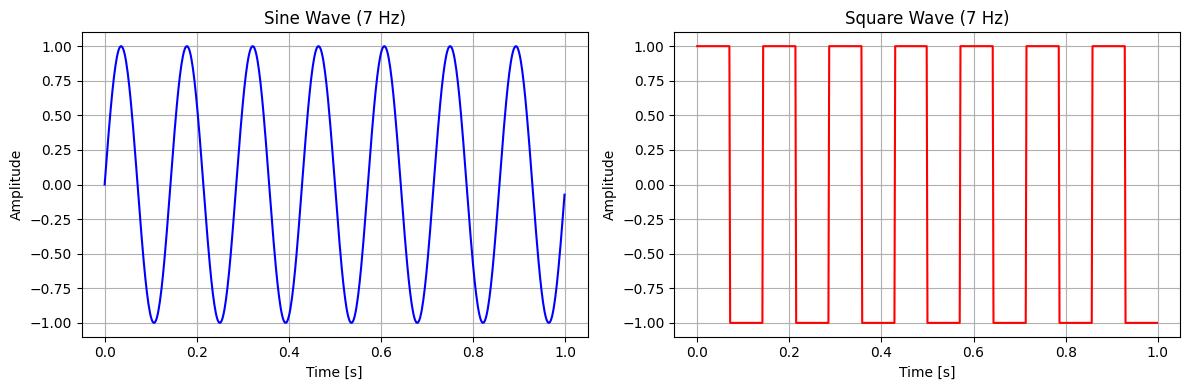

In [4]:
fs = 600   # Sampling frequency
f = 7      # Frequency of signals
t = np.linspace(0, 1, fs, endpoint=False)

sine_wave = np.sin(2 * np.pi * f * t)
square_wave = signal.square(2 * np.pi * f * t)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, sine_wave, 'b')
plt.title('Sine Wave (7 Hz)')
plt.xlabel('Time [s]'); plt.ylabel('Amplitude'); plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t, square_wave, 'r')
plt.title('Square Wave (7 Hz)')
plt.xlabel('Time [s]'); plt.ylabel('Amplitude'); plt.grid(True)
plt.tight_layout()
plt.show()

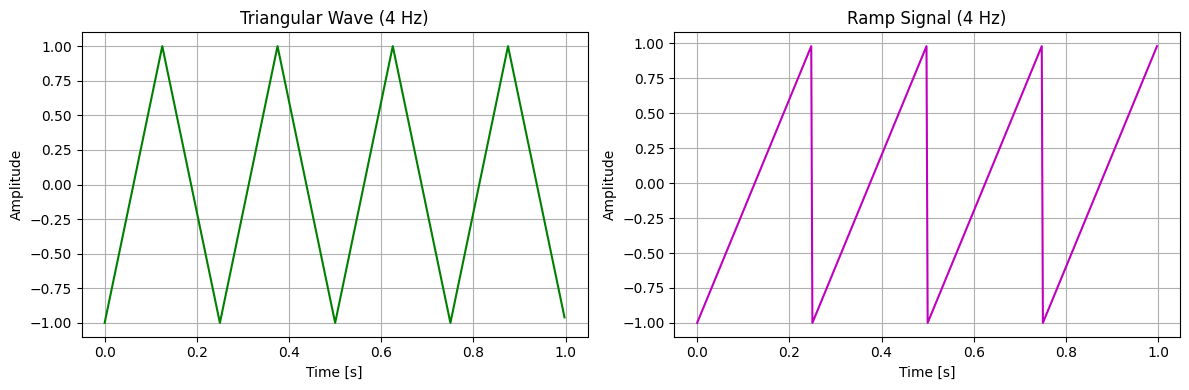

In [5]:
fs = 400
t = np.linspace(0, 1, fs, endpoint=False)
f = 4

triangular_wave = signal.sawtooth(2 * np.pi * f * t, 0.5)
ramp_signal = signal.sawtooth(2 * np.pi * f * t)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, triangular_wave, 'g')
plt.title('Triangular Wave (4 Hz)')
plt.xlabel('Time [s]'); plt.ylabel('Amplitude'); plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t, ramp_signal, 'm')
plt.title('Ramp Signal (4 Hz)')
plt.xlabel('Time [s]'); plt.ylabel('Amplitude'); plt.grid(True)
plt.tight_layout()
plt.show()

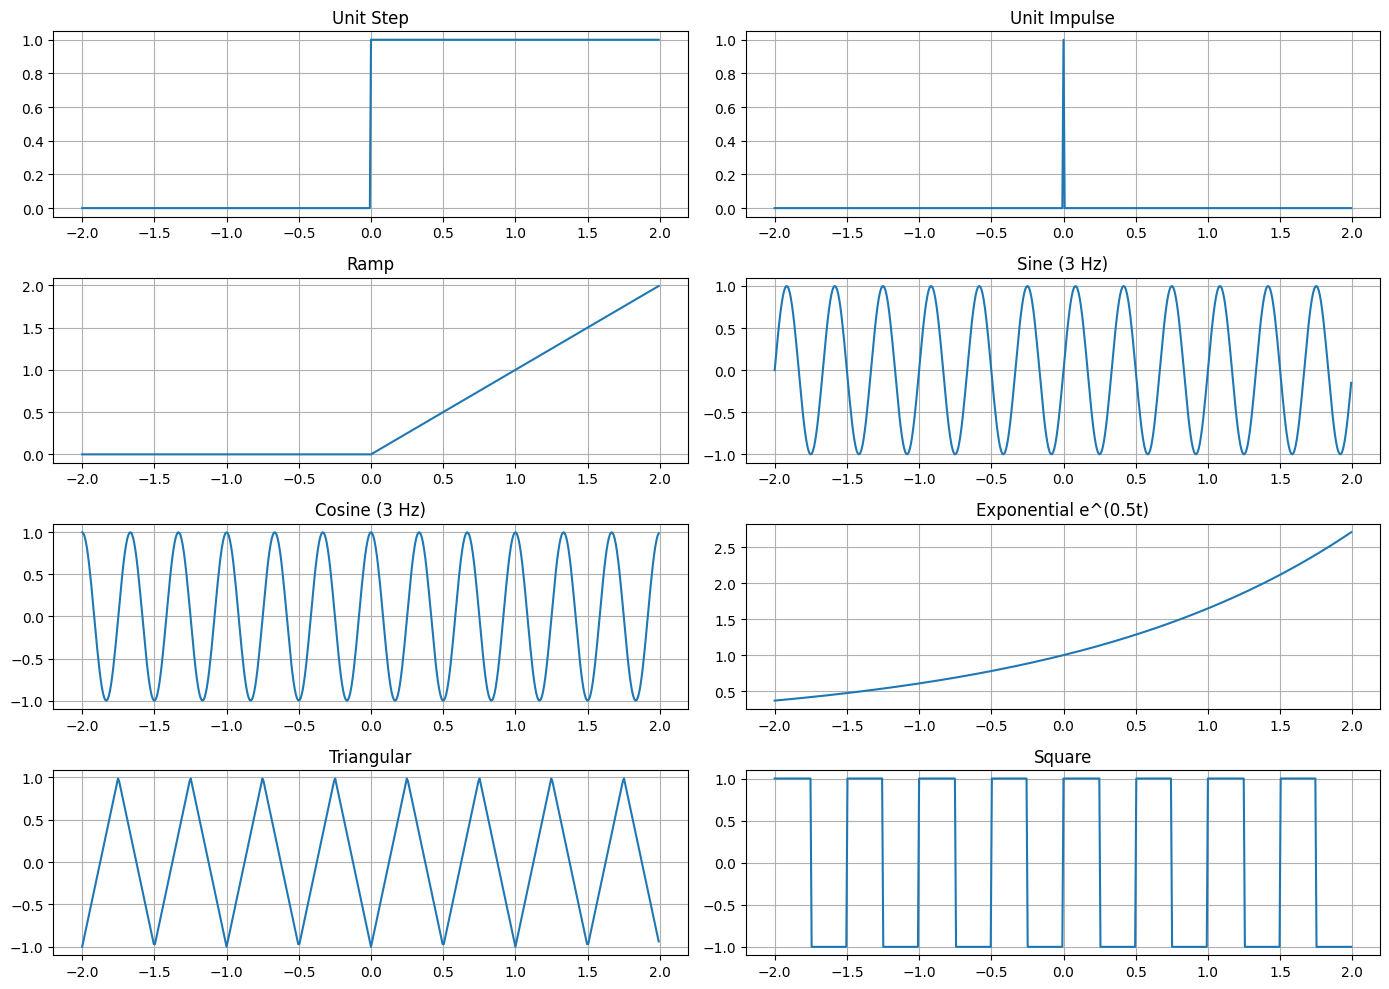

In [6]:
fs = 500
t2 = np.linspace(-2, 2, fs, endpoint=False)

unit_step = np.heaviside(t2, 1)
unit_impulse = np.zeros_like(t2); unit_impulse[len(t2)//2] = 1
ramp_signal = np.maximum(0, t2)
sine_wave = np.sin(2 * np.pi * 3 * t2)
cosine_wave = np.cos(2 * np.pi * 3 * t2)
exponential_signal = np.exp(0.5 * t2)
triangular_wave = signal.sawtooth(2 * np.pi * 2 * t2, 0.5)
square_wave = signal.square(2 * np.pi * 2 * t2)

plt.figure(figsize=(14, 10))
signals = [unit_step, unit_impulse, ramp_signal, sine_wave, cosine_wave, exponential_signal, triangular_wave, square_wave]
titles = ['Unit Step', 'Unit Impulse', 'Ramp', 'Sine (3 Hz)', 'Cosine (3 Hz)', 'Exponential e^(0.5t)', 'Triangular', 'Square']

for i, sig in enumerate(signals, 1):
    plt.subplot(4, 2, i)
    plt.plot(t2, sig)
    plt.title(titles[i-1])
    plt.grid(True)

plt.tight_layout()
plt.show()

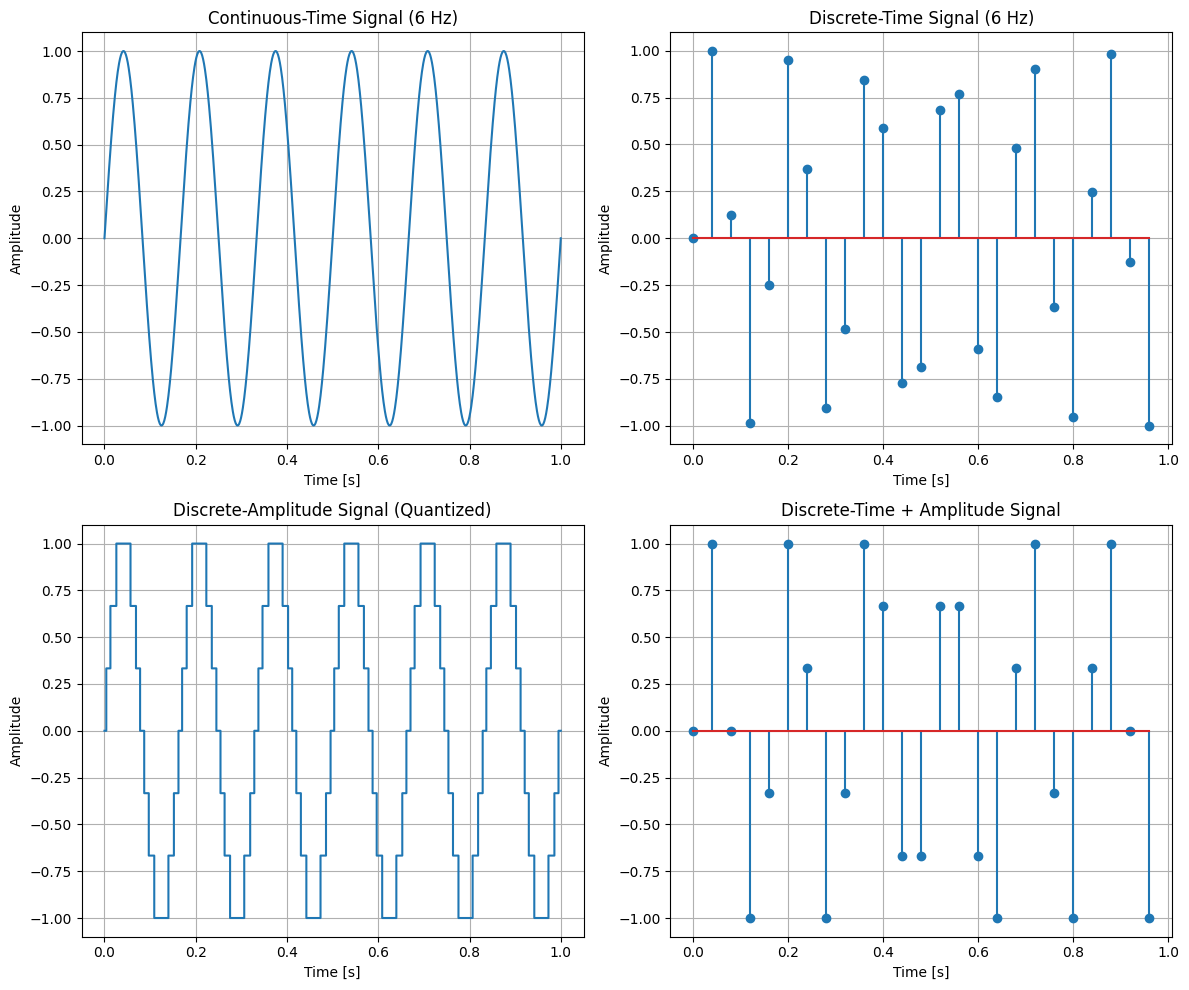

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling rate for discrete signal
fs_discrete = 25

# Time arrays
t_continuous = np.linspace(0, 1, 1000)     # continuous (fine grid)
t_discrete = np.arange(0, 1, 1/fs_discrete) # discrete (25 samples/sec)

# Frequency of signal
f = 6

# Continuous signal
continuous_signal = np.sin(2 * np.pi * f * t_continuous)

# Discrete-time signal
discrete_time_signal = np.sin(2 * np.pi * f * t_discrete)

# Quantization (Discrete amplitude)
num_levels = 6
discrete_amplitude_signal = np.round(continuous_signal * (num_levels/2)) / (num_levels/2)

# Discrete in both time and amplitude
discrete_time_amplitude_signal = np.round(discrete_time_signal * (num_levels/2)) / (num_levels/2)

# Plotting
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(t_continuous, continuous_signal)
plt.title('Continuous-Time Signal (6 Hz)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.stem(t_discrete, discrete_time_signal)            # removed use_line_collection
plt.title('Discrete-Time Signal (6 Hz)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(t_continuous, discrete_amplitude_signal, drawstyle='steps-pre')
plt.title('Discrete-Amplitude Signal (Quantized)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.stem(t_discrete, discrete_time_amplitude_signal)  # removed use_line_collection
plt.title('Discrete-Time + Amplitude Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


TypeError: stem() got an unexpected keyword argument 'use_line_collection'

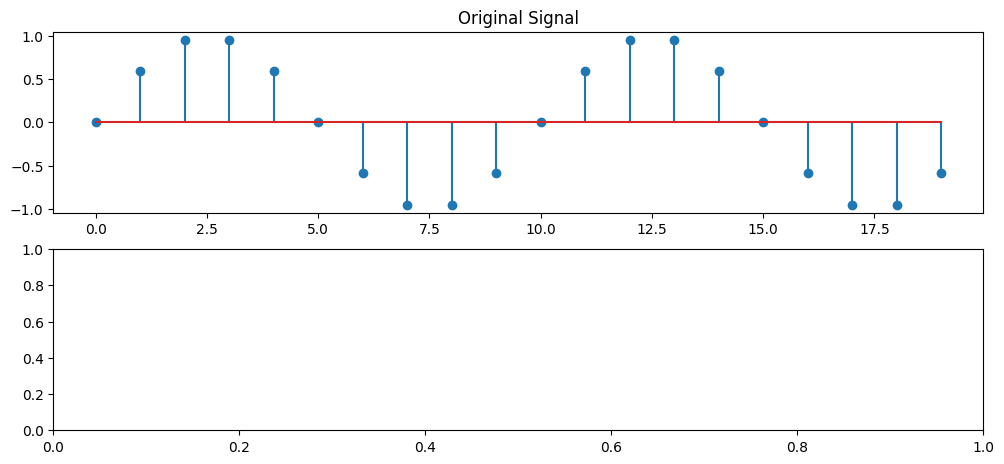

In [ ]:
n = np.arange(0, 20)
x = np.sin(0.2 * np.pi * n)

delay = 3
delayed_signal = np.zeros_like(x)
delayed_signal[delay:] = x[:-delay]

advance = 3
advanced_signal = np.zeros_like(x)
advanced_signal[:-advance] = x[advance:]

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1); plt.stem(n, x, ); plt.title('Original Signal')
plt.subplot(3, 1, 2); plt.stem(n, delayed_signal, ); plt.title('Delayed Signal (3 samples)')
plt.subplot(3, 1, 3); plt.stem(n, advanced_signal, ); plt.title('Advanced Signal (3 samples)')
plt.tight_layout()
plt.show()